<a href="https://colab.research.google.com/github/mmaruthi/Assignment4/blob/master/Gradcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import cv2
from keras import backend as K
from skimage import io

Using TensorFlow backend.


In [0]:
def gradcam(inp):
    model = VGG16(weights="imagenet")
    from skimage import io
    from keras.preprocessing import image
    #dog = io.imread("https://www.rspcapetinsurance.org.au/rspca/media/images/hero/dog-insurance-hero.jpg")
    cat = io.imread(inp)
    cat = cv2.resize(cat, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
    x = image.img_to_array(cat)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model.predict(x)
    class_idx = np.argmax(preds[0])
    print(class_idx)
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer("block5_conv3")

    grads = K.gradients(class_output, last_conv_layer.output)[0]
    print(grads.shape)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    print(pooled_grads.shape)
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    pooled_grads_value, conv_layer_output_value = iterate([x])

    for i in range(512):
       conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis = -1)
    print(conv_layer_output_value.shape)
    print(heatmap.shape)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    heatmap = cv2.resize(heatmap, (cat.shape[1], cat.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(cat, 0.5, heatmap, 0.5, 0)
    from google.colab.patches import cv2_imshow
    cv2_imshow( cat)
    cv2_imshow(superimposed_img)





553467904/553467096 [==============================] - 6s 0us/step






153
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


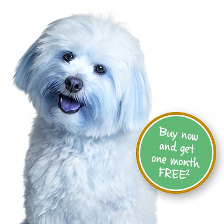

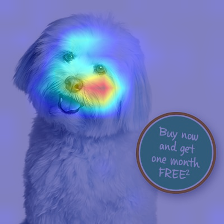

In [3]:
gradcam("https://www.rspcapetinsurance.org.au/rspca/media/images/hero/dog-insurance-hero.jpg")

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Cat-images.zip to Cat-images.zip


In [0]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['Cat-images.zip']), 'r')
data.extractall()

In [6]:
data.printdir()

File Name                                             Modified             Size
Cat-images/                                    2019-12-06 11:24:52            0
Cat-images/cat.4003.jpg                        2019-12-06 11:24:52        20878
Cat-images/cat.4005.jpg                        2019-12-06 11:24:52        18252
Cat-images/cat.4008.jpg                        2019-12-06 11:24:52        30226
Cat-images/cat.4009.jpg                        2019-12-06 11:24:52        28789
Cat-images/cat.4021.jpg                        2019-12-06 11:24:52        18233
Cat-images/dog.4004.jpg                        2019-12-06 11:24:52        32744
Cat-images/dog.4008.jpg                        2019-12-06 11:24:52        27360
Cat-images/dog.4013.jpg                        2019-12-06 11:24:52        15252
Cat-images/dog.4020.jpg                        2019-12-06 11:24:52        13015
Cat-images/dog.4026.jpg                        2019-12-06 11:24:52        32945


['cat.4005.jpg', 'dog.4004.jpg', 'cat.4021.jpg', 'dog.4008.jpg', 'cat.4009.jpg', 'cat.4008.jpg', 'dog.4020.jpg', 'dog.4013.jpg', 'cat.4003.jpg', 'dog.4026.jpg']
cat.4005.jpg
Cat-images/cat.4005.jpg
281
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


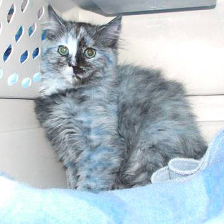

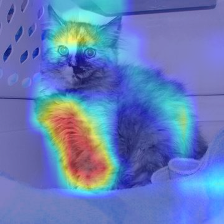

dog.4004.jpg
Cat-images/dog.4004.jpg
268
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


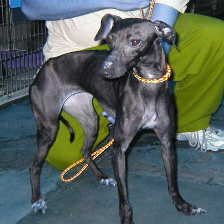

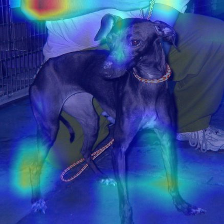

cat.4021.jpg
Cat-images/cat.4021.jpg
285
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


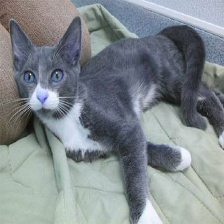

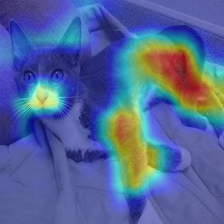

dog.4008.jpg
Cat-images/dog.4008.jpg
167
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


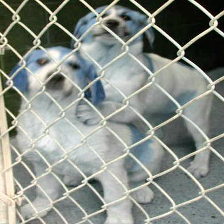

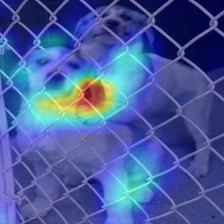

cat.4009.jpg
Cat-images/cat.4009.jpg
284
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


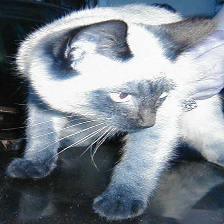

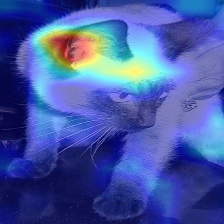

cat.4008.jpg
Cat-images/cat.4008.jpg
216
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


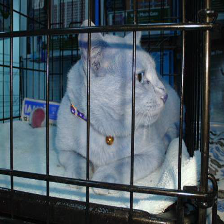

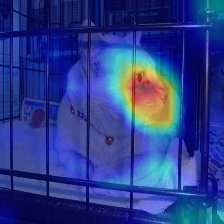

dog.4020.jpg
Cat-images/dog.4020.jpg
162
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


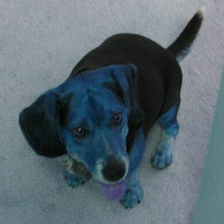

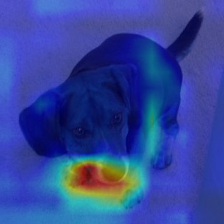

dog.4013.jpg
Cat-images/dog.4013.jpg
369
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


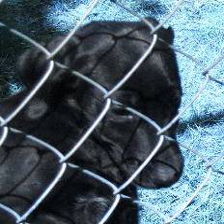

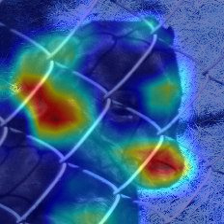

cat.4003.jpg
Cat-images/cat.4003.jpg
282
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


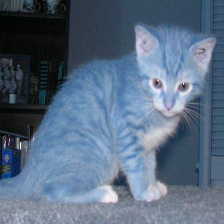

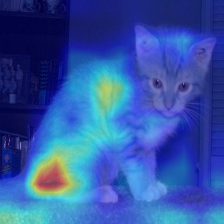

dog.4026.jpg
Cat-images/dog.4026.jpg
208
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


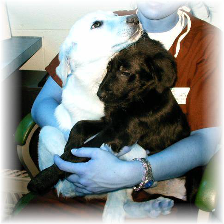

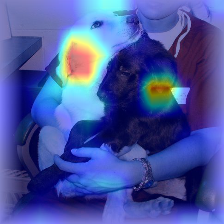

In [7]:
import cv2
import os
import matplotlib.pyplot as plt
items = os.listdir('Cat-images')
print (items)
for each_image in items:
  if each_image.endswith(".jpg"):
   print (each_image)
   full_path = "Cat-images/" + each_image
   print (full_path)
   #image = cv2.imread(full_path)
   gradcam(full_path)
  #image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#plt.figure()
#plt.imshow(image)
#plt.colorbar()
#plt.grid(False)